## 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.

정밀도와 재현율은 다음과 같은 공식으로 계산된다.

> 정밀도 = TP / ( FP + TP )
> 재현율 = TP / ( FN + TP )

정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.

재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.

공식의 분모인 FN + TP 는 실제 값이 Positive인 모든 데이터 건수이며 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다.   
민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불린다.

`재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우`

ex) 실제 Positive인 암 환자를 Postive 양성이 아닌 Negative 음성으로 판단



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [28]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix( y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [31]:
# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/03 평가/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.20, random_state=11)

In [33]:
lr_clf = LogisticRegression()

In [34]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 재현율: 0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 정밀도 / 재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우   
결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.

하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다.

이를 `정밀도/재현율의 트레이드오프(Trade-off)` 라고 한다.

In [35]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병함(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46191519 0.53808481 1.        ]
 [0.878675   0.121325   0.        ]
 [0.87716185 0.12283815 0.        ]]


In [36]:
from sklearn.preprocessing import Binarizer

In [37]:
X = [[ 1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

In [38]:
# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [39]:
from sklearn.preprocessing import Binarizer

In [40]:
# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

In [41]:
# predict_proba () 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 재현율: 0.7869


임계값을 낮추니 재현율 값이 올라가고, 정밀도가 떨어진다.

분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 된다.

확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임곗값을 낮출수록 True 값이 많아지게 된다.



In [42]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값: ', custom_threshold)
    get_clf_eval(y_test, custom_predict)

In [43]:
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds )

임곗값:  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 재현율: 0.8361
임곗값:  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 재현율: 0.8033
임곗값:  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 재현율: 0.7869
임곗값:  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 재현율: 0.7541
임곗값:  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 재현율: 0.7377


In [44]:
from sklearn.metrics import precision_recall_curve

In [45]:
# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

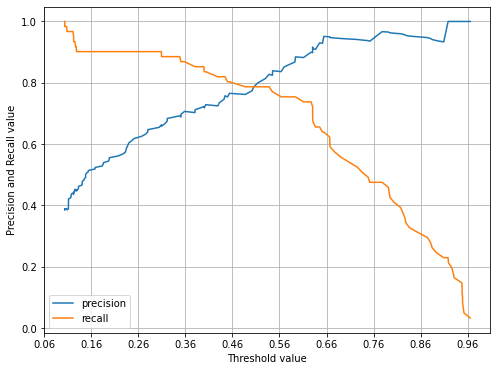

In [47]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
  precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

  # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
  plt.figure(figsize=(8, 6))
  threshold_boundary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='-', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

  # threshold 값 X 축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  
  # x축, y축 label과 legend, 그리고 grid 설정
  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### 정밀도와 재현율의 맹점

위에서 Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다,

임계값의 이러한 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다.   
그렇지 않고 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용돼서는 안된다.

다음은 정밀도 또는 재현율 평가 지표 중 하나를 극단적으로 높이는 방법이지만, 숫자 놀음에 불과하다.

---

**정밀도가 100%가 되는 방법**

확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측한다.

예를 들어 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건 Positive, 다른 경우는 Negative로 예측하는 거다.

`정밀도 = TP / (TP + FP)` 이다.

전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면, 이 한 명만 Positive 로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1 이 되므로

정밀도는 1 / (1 + 0) 으로 100%가 된다.

---
**재현율이 100%가 되는 방법**

모든 환자를 Positive로 예측한다.   
재현율 = TP / (TP + FN) 이므로 전체 환자 1000명을 다 Positive로 예측한다.

이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30 + 0) 이므로 100%가 된다.



---

이처럼 정밀도와 재현율 성능 수치도 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하다.

따라서 정밀도 또는 재현율 중 하나만 스코어가 좋고 다른 하나는 스코어가 나쁜 분류는 성능이 좋지 않은 분류로 간주할 수 있다.




---

## 04 F1 스코어

`F1 스코어(Score)` 는 정밀도와 재현율을 결합한 지표이다.

F1 스코어는 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.

사이ㅣ킷런은 F1 스코어를 구하기 위해 f1_score()라는 API를 제공한다.

이를 이용해 정밀도와 재현율 절의 예제에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어를 구한다.

` F1 = 2 / (1/recall + 1/precision) = 2 * (precision * recall) /( precison + recall) `

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [52]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  
  #F1 스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))



In [53]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값:  0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727
임곗값:  0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840
임곗값:  0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805
임곗값:  0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931
임곗값:  0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036
